In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

scores = 0.9267
estimator weights | errors
[[1.         0.15333333]
 [1.         0.2991273 ]
 [1.         0.28606095]
 [1.         0.3244577 ]
 [1.         0.29750267]
 [1.         0.49684666]
 [1.         0.49946716]
 [1.         0.49985069]
 [1.         0.4999639 ]
 [1.         0.49999118]
 [1.         0.49991681]
 [1.         0.49999707]
 [1.         0.49998313]
 [1.         0.49995609]
 [1.         0.49998919]
 [1.         0.49999825]
 [1.         0.49996911]
 [1.         0.49999958]
 [1.         0.4999994 ]
 [1.         0.49999931]
 [1.         0.49999954]
 [1.         0.49999986]
 [1.         0.49999999]
 [1.         0.49999997]
 [1.         0.49999999]
 [1.         0.49999998]
 [1.         0.5       ]
 [1.         0.49999997]
 [1.         0.5       ]
 [1.         0.5       ]]


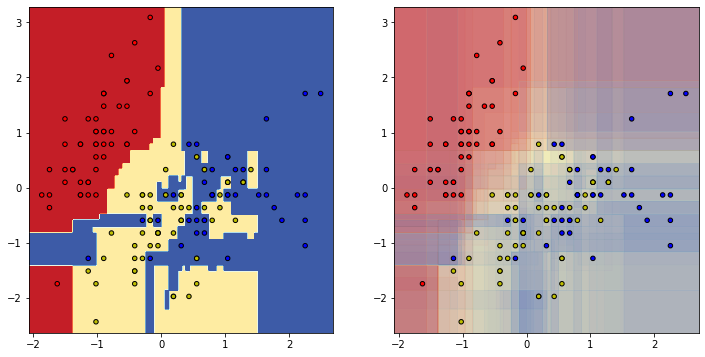

In [2]:
pair = [0, 1]
RANDOM_SEED = 13
plot_step = 0.02

# load iris dataset
iris = load_iris()

X_train = iris.data[:, pair]
y_train = iris.target

# Shuffle
idx = np.arange(X_train.shape[0])
np.random.seed(RANDOM_SEED)
np.random.shuffle(idx)
X_train = X_train[idx]
y_train = y_train[idx]

# Standardize
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

# Train and score
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=30, algorithm="SAMME.R", learning_rate=0.7)
model.fit(X_train, y_train)
scores = model.score(X_train, y_train)
print('scores = %.4f' % scores)
print('estimator weights | errors')
print(np.c_[model.estimator_weights_, model.estimator_errors_])

# print('x_train probability | y_train of first 20 samples')
# print(np.c_[model.predict_proba(X_train[:20, :]), y_train[:20]])

# Plot
plt.figure(figsize=(6 * 2, 6))

x_min = X_train[:, 0].min() - .2
x_max = X_train[:, 0].max() + .2
y_min = X_train[:, 1].min() - .2
y_max = X_train[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

plt.subplot(1, 2, 1)
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.RdYlBu)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['r', 'y', 'b']), edgecolor='k', s=20)

plt.subplot(1, 2, 2)
estimator_alpha = 1. / len(model.estimators_)
for tree in model.estimators_:
    z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, z, alpha=estimator_alpha, cmap=plt.cm.RdYlBu)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['r', 'y', 'b']), edgecolor='k', s=20)

plt.show()